In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io


In [2]:
cv2.__version__

'4.10.0'

In [3]:
print(type(cv2))

<class 'module'>


In [4]:
! pwd

/Users/aasibipin/cosc-32001-computer-vision/basics


In [5]:
image_path = '../images/blue.png'


## What is a method?

In [6]:
# KISS (Keep It Simple, Stupid)

# Function that belongs to a class 

class FileReader:
    """
    This is a doc string
    """

    def __init__(self, file_path):
        self.file_path = None
        self.image = None
        self.image_rgb = None

    def read_image(self):
        self.image = cv2.imread(image_path)
        # Need to convert the BGR to RGB
        # Uses BGR because of cameras  https://stackoverflow.com/a/33787594 
        self.image_rgb = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)

    def show_image(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(image)
        plt.axis('off')
        plt.show()

    # This is an optimization which you may do when you have large images.
    # That does not use up as much memory.
    # def show_rgb_image(self):
    #     plt.figure(figsize=(8, 6))
    #     plt.imshow(self.image_rgb)
    #     plt.axis('off')
    #     plt.show()

    # def show_og_image(self):
    #     plt.figure(figsize=(8, 6))
    #     plt.imshow(self.image)
    #     plt.axis('off')
    #     plt.show()


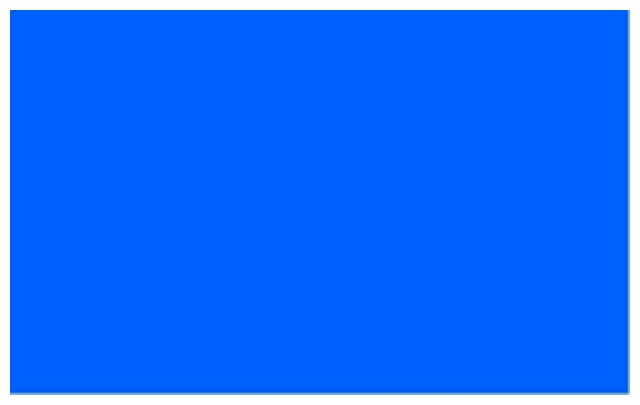

In [7]:
fr = FileReader(image_path) 
fr.read_image()
fr.show_image(fr.image_rgb)

The bottom most row = `fr.image_rgb[:,-1]`

The top most row = `fr.image_rgb[:,0]`


The left most column = `fr.image_rgb[0,:]`

The top most row = `fr.image_rgb[-1,:]`


Access a pixel `fr.image_rgb[2,0]`




## Dunder Methods

In [8]:
image_path + '21'

'../images/blue.png21'

In [9]:
image_path.__add__('21')

'../images/blue.png21'

In [10]:
image_path == '21'

False

In [11]:
image_path.__eq__('21')

False

One pixel contains RGB values:  [  0  96 255]


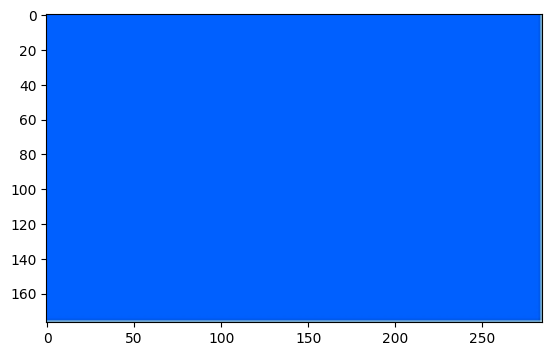

In [12]:
# Uses a RGB Mapping


img = io.imread(image_path)

im_ax = plt.imshow(img)

print('One pixel contains RGB values: ', img[0][0])

## **SCALING** an image

1. **Rescaling**:
   - Adjusts the image size by a scale factor (e.g., 1/4), either with or without anti-aliasing.
   - Proportional scaling keeps the aspect ratio consistent.
2. **Resizing**:
   - Changes the image to a fixed size (e.g., 200x200 pixels), potentially altering its aspect ratio.
3. **Downscaling**:
   - Reduces the resolution of the image using local means, which is memory efficient and avoids artifacts.



In [13]:
import matplotlib.pyplot as plt
from skimage import io, color  
from skimage.transform import rescale, resize, downscale_local_mean  
from skimage.util import img_as_ubyte 


- The image `Osteosarcoma_01.tif` is read in grayscale mode (`as_gray=True`), meaning pixel values will be between 0 and 1.
- The image is displayed in its original format and again using a grayscale colormap (`cmap='gray'`).


In [14]:
gray_img = io.imread("../images/Osteosarcoma_01.tif", as_gray=True)
gray_img.shape

(1104, 1376)

In [15]:
# Remember this uses RGB
color_img = io.imread("../images/Osteosarcoma_01.tif")
color_img.shape

(1104, 1376, 3)

In [16]:
l = [
    [1,2,3,4,4],
    [1,2,3,4,4],
    [1,2,3,4,4],
    [1,2,3,4,4],
    [1,2,3,4,4],
    [1,2,3,4,4],
    [1,2,3,4,4],
]    
# Index for all values in a 2D list
l[:][:]


[[1, 2, 3, 4, 4],
 [1, 2, 3, 4, 4],
 [1, 2, 3, 4, 4],
 [1, 2, 3, 4, 4],
 [1, 2, 3, 4, 4],
 [1, 2, 3, 4, 4],
 [1, 2, 3, 4, 4]]

In [17]:
l[0][0]

1

In [18]:

l = [
    [1,2,3,4,4],
    [1,2,3,4,4],
    [1,2,3,4,4],
    [1,2,3,4,4],
]   

l_n = np.array(l)
# Index for all values in a 2D np array
l_n[:,:]

array([[1, 2, 3, 4, 4],
       [1, 2, 3, 4, 4],
       [1, 2, 3, 4, 4],
       [1, 2, 3, 4, 4]])

In [19]:
l_n[0,0]

np.int64(1)

In [20]:
l_n[0][0]

np.int64(1)

For an 8-bit image (most common), pixel intensity values range from 0 to 255.

Use 256 bins, one for each possible intensity value.


(16-bit images: Intensities range from 0 to 65,535. Use 65,536 bins for precise histograms)

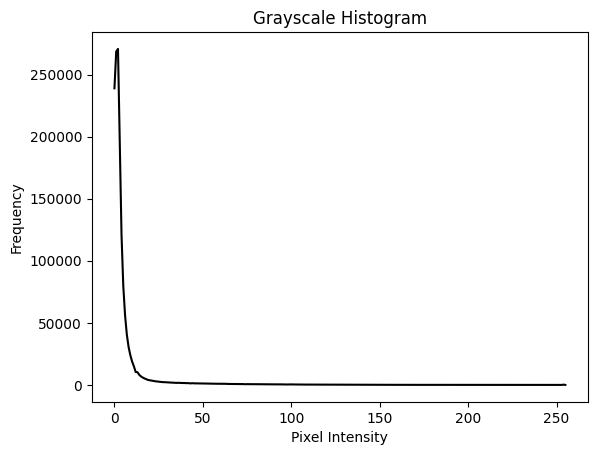

In [21]:
# Extract only Red (RGB) - 0th index, for all rows and columns
red_img = color_img[:,:,0]

bins = 256

# returns histrogram of "red image"
histogram, bin_edges = np.histogram(red_img, bins=bins, range=(0, bins))
# Plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(bin_edges[:-1], histogram, color='black')  # bin_edges[:-1] matches bin centers with histogram values
plt.show()


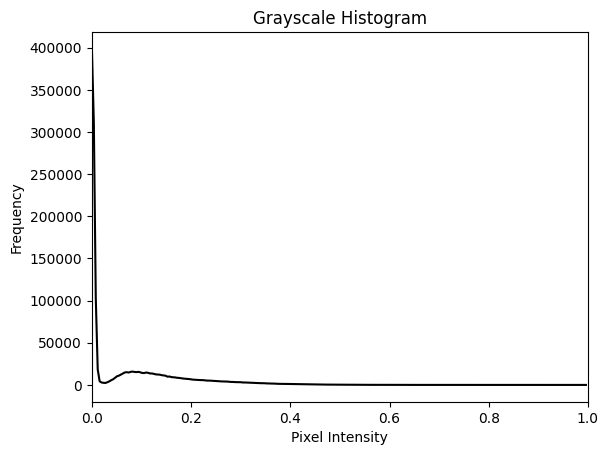

In [22]:
# Histogram of our grey-scale image
# Calculate histogram using numpy
histogram, bin_edges = np.histogram(gray_img, bins=256, range=(0, 1))

# Plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(bin_edges[:-1], histogram, color='black')  # bin_edges[:-1] matches bin centers with histogram values
plt.xlim([0, 1])
plt.show()


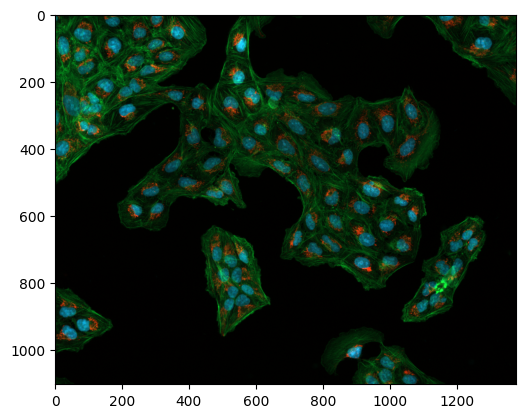

In [23]:

img = io.imread("../images/Osteosarcoma_01.tif")
plt.imshow(img)
plt.imshow(img)


### **3. Rescaling with and without Anti-Aliasing**
#### Rescaling Without Anti-Aliasing:

In [24]:
rescale?

Signature:
rescale(
    image,
    scale,
    order=None,
    mode='reflect',
    cval=0,
    clip=True,
    preserve_range=False,
    anti_aliasing=None,
    anti_aliasing_sigma=None,
    *,
    channel_axis=None,
)
Docstring:
Scale image by a certain factor.

Performs interpolation to up-scale or down-scale N-dimensional images.
Note that anti-aliasing should be enabled when down-sizing images to avoid
aliasing artifacts. For down-sampling with an integer factor also see
`skimage.transform.downscale_local_mean`.

Parameters
----------
image : (M, N[, ...][, C]) ndarray
    Input image.
scale : {float, tuple of floats}
    Scale factors for spatial dimensions. Separate scale factors can be defined as
    (m, n[, ...]).

Returns
-------
scaled : ndarray
    Scaled version of the input.

Other parameters
----------------
order : int, optional
    The order of the spline interpolation, default is 0 if
    image.dtype is bool and 1 otherwise. The order has to be in
    the range 0-5. See 

The `rescale` function from the **scikit-image** library uses **interpolation** to up-scale or down-scale images. The specific interpolation technique depends on the **`order`** parameter. Here's an explanation of how it works:

---

### **Key Parameter: `order`**
The `order` parameter specifies the interpolation method used during scaling:

| **Order** | **Interpolation Method** | **Details**                                                                                              |
|-----------|---------------------------|----------------------------------------------------------------------------------------------------------|
| `0`       | Nearest-Neighbor          | Selects the value of the nearest pixel. Fast but results in blocky artifacts (jagged edges).             |
| `1`       | Bilinear                  | Computes the value of a new pixel as a weighted average of the four nearest pixels. Produces smoother results. |
| `2`       | Bi-quadratic              | Uses quadratic polynomials for interpolation. Smoother than bilinear but slower.                         |
| `3`       | Bi-cubic                  | Computes the weighted average of 16 nearest pixels using cubic polynomials. Very smooth but computationally intensive. |
| `4+`      | Higher-Order Splines      | Uses increasingly complex splines for interpolation. Not commonly needed and computationally expensive.  |

By default, **`order=1` (bilinear interpolation)** is used.

---

### **How It Works**
1. **Upscaling**:
   - New pixels are added between existing pixels, and their values are computed using the chosen interpolation method.
   - For example, bilinear interpolation averages the values of the surrounding pixels, resulting in smooth transitions.

2. **Downscaling**:
   - Pixels are combined into larger regions, and the values are interpolated to create the new, smaller image.
   - **Anti-Aliasing**: When downscaling, the `anti_aliasing` parameter applies a Gaussian filter to smooth out the image before interpolation, reducing artifacts (like jagged edges or aliasing).

---

### **Other Parameters**
- **`mode`**:
  - Determines how the image boundaries are handled during interpolation.
  - Common modes:
    - `'reflect'`: Reflects pixel values at the boundary.
    - `'constant'`: Pads the image with a constant value (specified by `cval`).
- **`preserve_range`**:
  - Ensures that the output values remain within the range of the input image (e.g., 0–255 for uint8 images).

---

### **Real-World Applications**
- **Upscaling**: Enlarging images for high-resolution displays or feature extraction.
- **Downscaling**: Reducing image size for storage, faster processing, or compatibility with machine learning models.


New pixel values are computed using interpolation:
Nearest Neighbor: Assigns the value of the nearest pixel from the original image to the new pixel. (Simple, but can lead to jagged edges.)
Bilinear: Averages the values of the 4 nearest pixels.
Bicubic: Uses 16 nearest pixels for smoother results.
Anti-aliasing: Applies a smoothing filter before downscaling to reduce artifacts.


Original 2x2 image:
```
[[10, 20],
 [30, 40]]
```



4x4 output using nearest-neighbor:
```
[[10, 10, 20, 20],
 [10, 10, 20, 20],
 [30, 30, 40, 40],
 [30, 30, 40, 40]]
```



4x4 output using bilinear interpolation:
```
[[10, 15, 20, 20],
 [20, 25, 30, 30],
 [30, 35, 40, 40],
 [30, 35, 40, 40]]
```



4x4 output using bi-quadratic interpolation (approximation):
```
[[10, 13, 18, 20],
 [20, 23, 28, 30],
 [30, 33, 38, 40],
 [30, 33, 38, 40]]
```

Original 4x4 image:
```
[[10, 20, 30, 40],
 [50, 60, 70, 80],
 [90, 100, 110, 120],
 [130, 140, 150, 160]]
```



2x2 output using nearest-neighbor:
```
[[10, 30],
 [90, 110]]
```



2x2 output using bilinear interpolation:
```
[[35, 55],
 [95, 115]]
```



2x2 output using bi-quadratic interpolation (approximation):
```
[[37, 53],
 [93, 113]]
```

### Application of **Nyquist sampling theorem**

To correctly represent high-frequency signals (e.g., sharp edges), the sampling rate (image resolution) **must be at least twice the highest frequency in the data.**

When downscaling, this condition is often violated, causing high-frequency details to be misrepresented in the lower resolution

**Upscaling** doesn’t inherently violate the Nyquist theorem (since new pixels are being added, not removed

### Smoothing High Frequencies:

- Anti-aliasing uses a low-pass filter (like a Gaussian blur) to smooth out high-frequency details (sharp edges and textures) before resizing the image.


- This prevents high-frequency details from being incorrectly mapped to lower frequencies, which causes visual artifacts.


In [60]:
img = io.imread("../images/Osteosarcoma_01.tif")

In [65]:
import pandas as pd

In [69]:
red = pd.DataFrame(img_rescaled_with_aliasing[:,:,0])

In [77]:
img.max()

np.uint8(255)

Text(0.5, 1.0, 'without aliasing\n(with anti-aliasing) aka blurring')

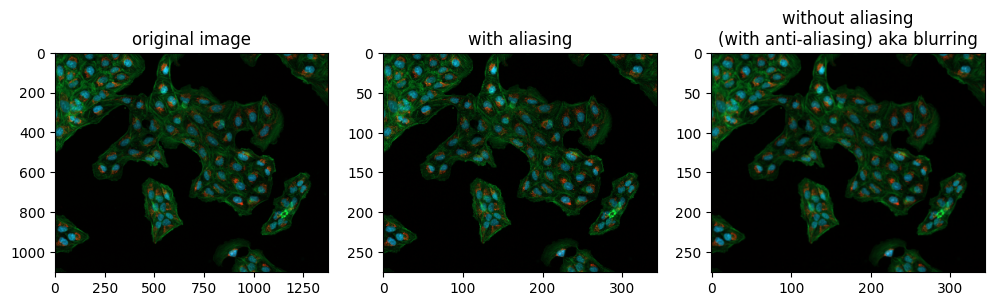

In [82]:
# Lets round decimal to u-int 8 like savages.

# when you apply rescaling note: that it will minmax to 0 to 1
img_rescaled_with_aliasing = rescale(
    img, 1.0 / 4.0, anti_aliasing=False, channel_axis = 2, preserve_range=True
).astype('uint8')

img_rescaled_without_aliasing = rescale(
    img, 1.0 / 4.0, anti_aliasing=True, channel_axis = 2, preserve_range=True
).astype('uint8')


fig, axes = plt.subplots(1,3, figsize=(12,8))
axes[0].imshow(img)
axes[1].imshow(img_rescaled_with_aliasing)
axes[2].imshow(img_rescaled_without_aliasing)
axes[0].set_title('original image')
axes[1].set_title('with aliasing')
axes[2].set_title('without aliasing\n(with anti-aliasing) aka blurring')


### Week 4 Homework

- Can you improve this code
- Can you plot 1 color across 3 images in one ax

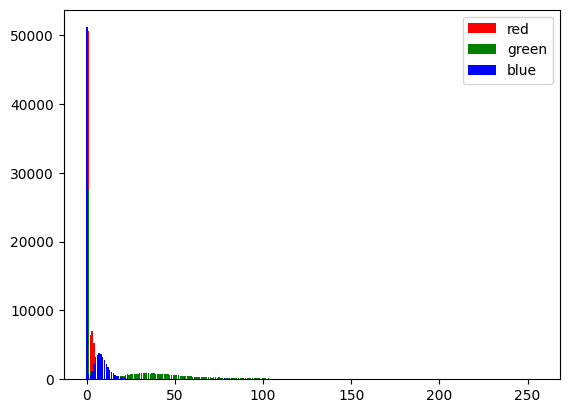

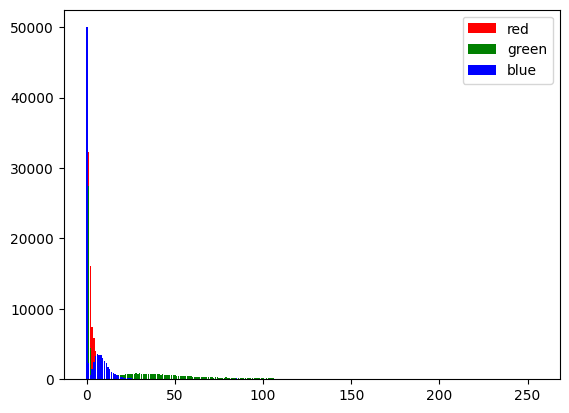

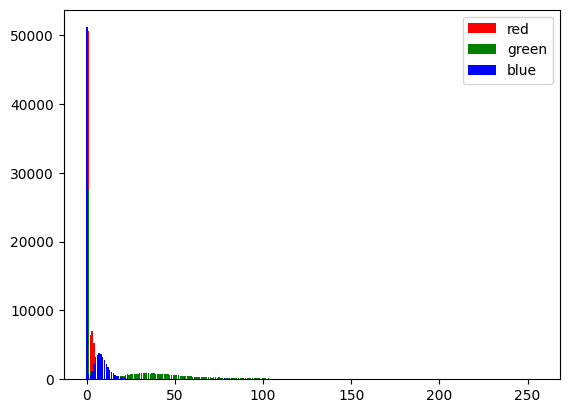

In [160]:
# Lets see if the histogram for these images are noramlly distributed

imgs = [img, img_rescaled_with_aliasing, img_rescaled_without_aliasing]
bins = 256

for img in imgs:
    fig, ax = plt.subplots()
    
    i = img[:,:,0]
    histogram, bin_edges = np.histogram(i,bins=bins,range=(0,bins))    
    ax.bar(bin_edges[:-1], histogram, color='red',label='red')
    
    i = img[:,:,1]
    histogram, bin_edges = np.histogram(i,bins=bins,range=(0,bins))
    ax.bar(bin_edges[:-1], histogram, color='green',label='green' )

    i = img[:,:,2]
    histogram, bin_edges = np.histogram(i,bins=bins,range=(0,bins))
    ax.bar(bin_edges[:-1], histogram, color='blue', label='blue')

    ax.legend()
    

In [ ]:
#### Rescaling With Anti-Aliasing:
Most aliasing we see in downsampling digital images occur in edges
Anti-aliasing essentially gaussian blur of an image (so the edges are smoother)

In [65]:
img.shape

(1104, 1376, 3)

In [66]:
img_rescaled_with_aa.shape

NameError: name 'img_rescaled_with_aa' is not defined

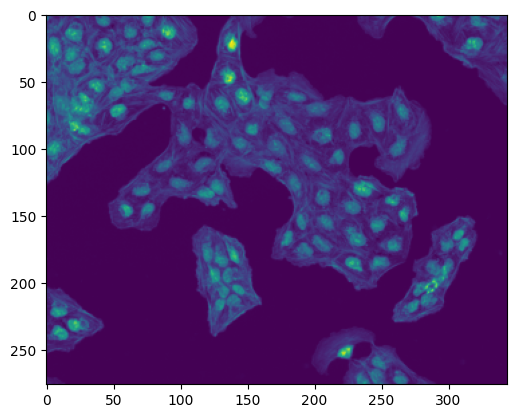

In [67]:
img_rescaled_with_aa = rescale(img, 1.0 / 4.0, anti_aliasing=True)
plt.imshow(img_rescaled_with_aa)

### **4. Resizing to Fixed Dimensions**

- The image is resized to exactly 200x200 pixels (not proportionally scaled).
- Anti-aliasing is used to maintain image quality during resizing.
- The result may look compressed or stretched depending on the aspect ratio of the original image.


In [194]:
img.shape

(1104, 1376, 3)

In [196]:
img_resized = resize(img, (200, 200))

img_resized.shape

(200, 200, 3)

In [ ]:
cv2.imshow('Loaded Image', img)

cv2.destroyAllWindows()


Text(0.5, 1.0, 'scaled')

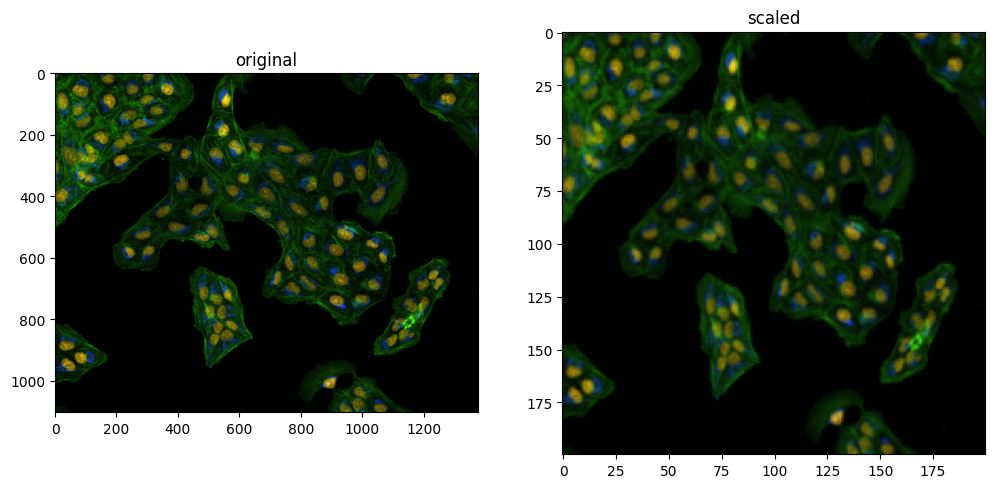

In [198]:
# Showcasing cv vs im
# imshow expects RGB(A) data, or 2D scalar 
fig, axes = plt.subplots(1,2, figsize=(12,8))
# Replacing the use of `plt.imshow` with the ax
axes[0].imshow(img)
axes[1].imshow(img_resized)
axes[0].set_title('original')
axes[1].set_title('scaled')


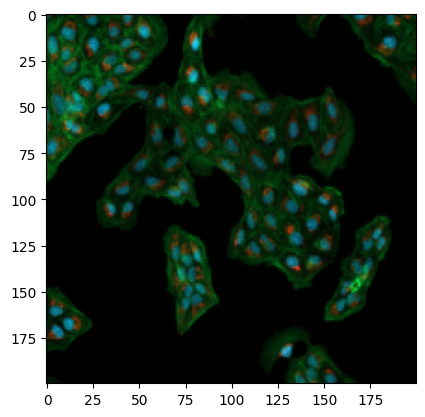

In [123]:
plt.imshow(img_resized)

### **5. Downscaling Using Local Means**

In [29]:
img.shape

(1104, 1376, 3)

In [113]:
[i/2 for i in (1104, 1376) ]

[552.0, 688.0]

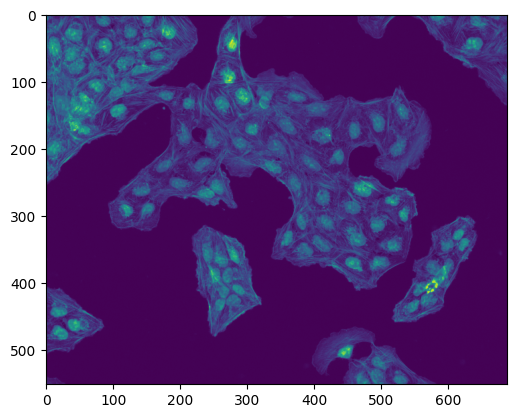

In [127]:
# only works with 2D images
img = io.imread("../images/Osteosarcoma_01.tif", as_gray=True)

# Does not work with 3d images. (only 2D)
img_downscaled = downscale_local_mean(img,  (2, 2))
plt.imshow(img_downscaled)
# - The image is **downscaled using the local mean** of each 4x3 block of pixels.
# - Each block of pixels in the original image is replaced with its average value, reducing the resolution while preserving the overall structure.


https://www.imatest.com/docs/nyquist-aliasing/

https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem


In [143]:
# Color code RGB 
io_img = io.imread("../images/Osteosarcoma_01.tif")


In [151]:
# Although you can get away with this, it can confuse the reader to think the image is 2D.
io_img[0,0,]

array([ 7, 69, 61], dtype=uint8)

In [149]:
# This is more explicit which python perfers
io_img[0,0,:]

array([ 7, 69, 61], dtype=uint8)

In [156]:
cv_img[0,0,:]

array([61, 69,  7], dtype=uint8)

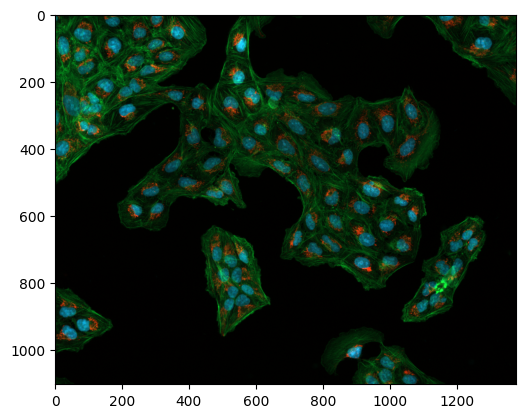

In [159]:
# In order to show a grey image set cmap
plt.imshow(io_img, cmap='gray')

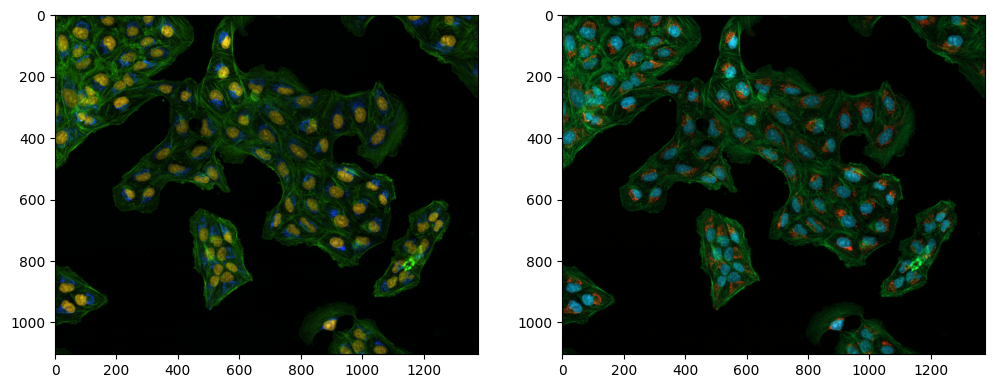

In [192]:
# Showcasing cv vs im
# imshow expects RGB(A) data, or 2D scalar 
fig, axes = plt.subplots(1,2, figsize=(12,8))
# Replacing the use of `plt.imshow` with the ax
axes[0].imshow(cv_img)
axes[1].imshow(io_img)

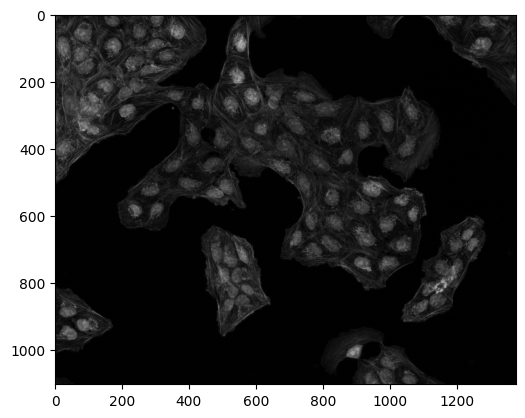

In [114]:
# In order to show a grey image set cmap
plt.imshow(gray_img, cmap='gray')

TO STUDY:
- 2D Convolution 
- Gaussian Filters/Kernal 
- Frequency Domain
- Fourier Transform
- Low Pass filters in images (mean) 
- Median Filters in images



RGB vs HSV, which is more memory efficient? 


When working with imaging codecs (color spaces like **RGB**, **HSV**, and **CIELAB**), each has unique trade-offs in terms of **speed**, **processing overhead**, and **use cases**. Here's a breakdown:

---

### **1. Speed: How Fast Are RGB, HSV, and CIELAB?**
The speed depends on the **computational complexity of the color space conversion** and the number of components used in processing.

#### **RGB**
- **Fastest**: RGB is the native format for most image data and requires no transformation when loaded (e.g., from files like `.jpg`, `.png`).
- **Why fast?**:
  - It directly represents pixel intensities for red, green, and blue channels.
  - Operations like filtering or arithmetic (e.g., blending) are fast since no conversion is needed.
- **Limitations**:
  - Not perceptually uniform (small changes in intensity may not correlate with human perception).
  - Poor for tasks requiring color manipulation or segmentation.

#### **HSV (Hue, Saturation, Value)**
- **Moderate Speed**: HSV requires converting RGB into a cylindrical representation of colors. The conversion involves trigonometric functions, which make it slower than RGB.
- **Why slower?**:
  - Computing **Hue** involves comparing channel values and performing calculations with atan2 (arctangent) for angles.
  - HSV Conversion: Takes ~2–3× longer for large images (e.g., 1080p or 4K).
- **Strengths**:
  - Excellent for color segmentation and manipulation.
  - Hue is independent of intensity, which is useful for isolating colors.
  - Applications: Object tracking, skin detection, color-based filtering.

#### **CIELAB (L\*a\*b\*)**
- **Slowest**: Conversion to CIELAB involves converting RGB to a linearized XYZ color space first, then applying perceptually uniform transformations.
- **Why slow?**:
  - Requires a gamma correction and a more computationally expensive conversion (power functions and conditions for each component).
  - CIELAB is perceptually uniform, meaning equal distances in the color space correspond to equal perceptual differences.
- **Strengths**:
  - Ideal for comparing colors or when perceptual differences matter.
  - Used in applications like image quality evaluation and printing where color precision is critical.

---

### **2. Use Cases: When to Use Each Codec**

| **Color Space** | **Speed** | **Use Case** | **Advantages** | **Disadvantages** |
|------------------|-----------|--------------|----------------|--------------------|
| **RGB**          | Fastest   | Basic image operations, visual rendering | Simple, native for most devices | Non-uniform, not good for segmentation |
| **HSV**          | Moderate  | Color segmentation, object tracking | Decouples color (Hue) from brightness (Value) | Slower conversions, less intuitive |
| **CIELAB**       | Slowest   | Color comparison, perceptual tasks | Perceptually uniform, great for precision | Slow, computationally heavy |

---


### **4. Questions to Ask**
1. Why might HSV be better than RGB for tasks like skin detection or tracking a specific object by color?
2. How does the perceptual uniformity of CIELAB benefit image quality assessment?
3. Can you think of a situation where computational speed (e.g., using RGB) outweighs the need for perceptual accuracy?



The HSV color space (Hue, Saturation, Value) is ideal when tasks involve color manipulation, segmentation, or detection because it decouples the chromatic (color) information from the intensity (brightness). Here are common use cases where HSV shines:




When Is CIELAB Worth the Cost?
CIELAB is ideal when perceptual uniformity is essential. Some use cases:

Color comparison: The Euclidean distance in CIELAB reflects perceptual color differences accurately.
Image quality assessment: Used to calculate metrics like ΔE (perceptual color difference).
Printing and color correction: Ensures colors appear consistent under different lighting.




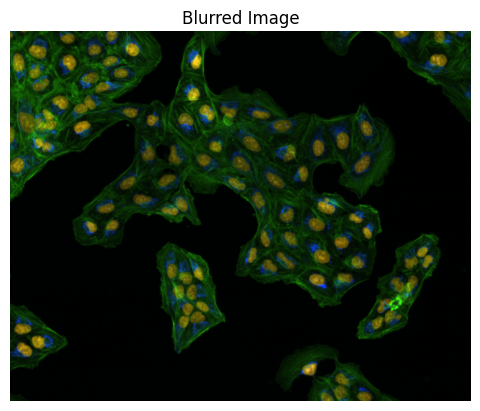

In [69]:
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)  # Apply Gaussian blur
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.title("Blurred Image")
plt.axis('off')
plt.show()


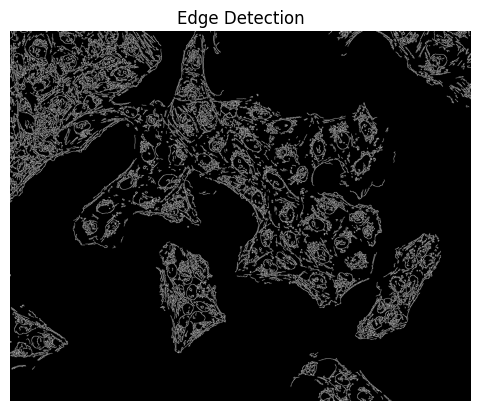

In [70]:
edges = cv2.Canny(img, threshold1=100, threshold2=200)  # Apply Canny Edge Detection
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.axis('off')
plt.show()


In [76]:
gray_img.dtype

dtype('float64')

In [75]:
cv2.calcHist?

Docstring:
calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
.   @overload
.   
.   this variant supports only uniform histograms.
.   
.   ranges argument is either empty vector or a flattened vector of histSize.size()*2 elements
.   (histSize.size() element pairs). The first and second elements of each pair specify the lower and
.   upper boundaries.
Type:      builtin_function_or_method

In [83]:
# only works with 2D images
img = io.imread("../images/Osteosarcoma_01.tif", as_gray=True)

hist = cv2.calcHist(img, [0], None, [256], [0, 256])  # Grayscale histogram
plt.plot(hist)
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/histogram.cpp:1008: error: (-210:Unsupported format or combination of formats)  in function 'calcHist'


Original dtype: float64, Range: (0.0, 0.9991666666666668)
Converted dtype: uint8, Range: (0, 254)


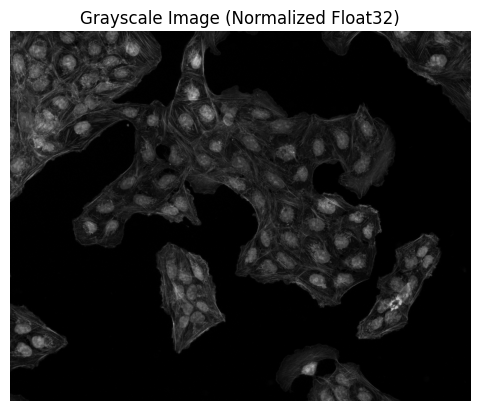

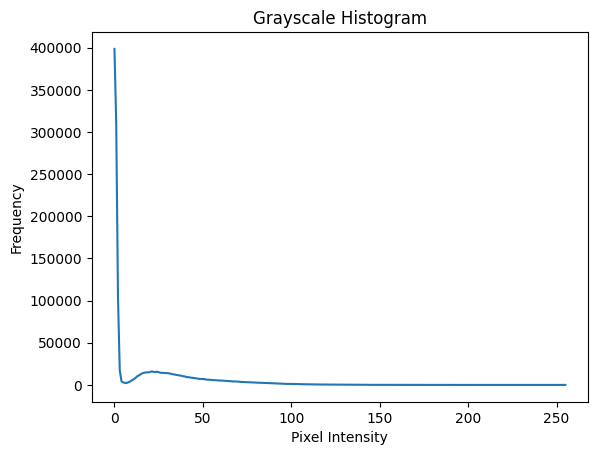

In [84]:
from skimage import io
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image as a float64 grayscale image (default behavior of skimage)
img = io.imread("../images/Osteosarcoma_01.tif", as_gray=True)

# Check the data type and range
print(f"Original dtype: {img.dtype}, Range: ({img.min()}, {img.max()})")



# Convert to uint8
img_uint8 = (img * 255).astype(np.uint8)
print(f"Converted dtype: {img_uint8.dtype}, Range: ({img_uint8.min()}, {img_uint8.max()})")

# Plot the normalized grayscale image
plt.imshow(img_uint8, cmap='gray')
plt.title("Grayscale Image (Normalized Float32)")
plt.axis("off")
plt.show()

# Calculate histogram
hist = cv2.calcHist([img_uint8], [0], None, [256], [0, 256])

# Plot histogram
plt.plot(hist)
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


Image dtype: float32, Range: (0.0, 1.0)


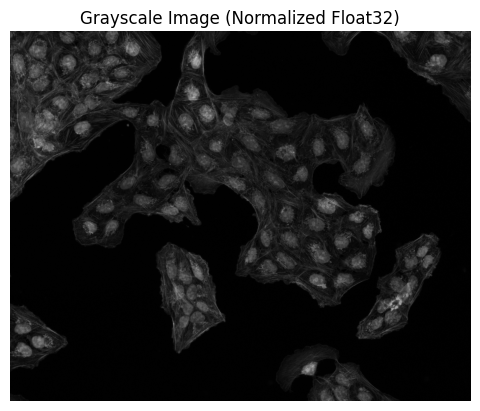

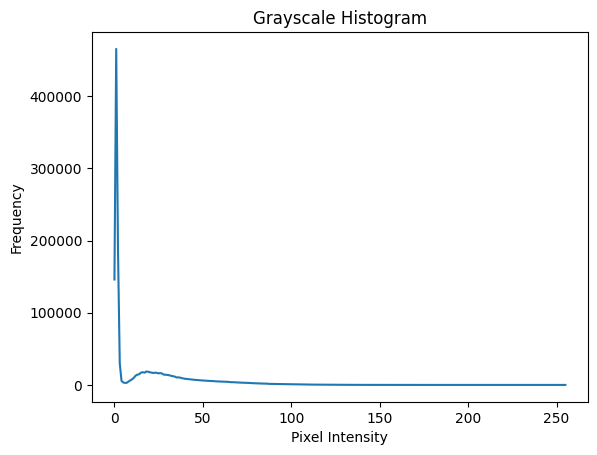

In [86]:
# Read the image as grayscale and convert to float32
img = cv2.imread("../images/Osteosarcoma_01.tif", cv2.IMREAD_GRAYSCALE).astype('float32') / 255.0

print(f"Image dtype: {img.dtype}, Range: ({img.min()}, {img.max()})")

# Plot the normalized grayscale image
plt.imshow(img, cmap='gray')
plt.title("Grayscale Image (Normalized Float32)")
plt.axis("off")
plt.show()

# hist = cv2.calcHist([img], [0], None, [256], [0, 256])
# Adjust the range and bins for normalized values
hist = cv2.calcHist([img], [0], None, [256], [0, 1])

# Plot histogram
plt.plot(hist)
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()



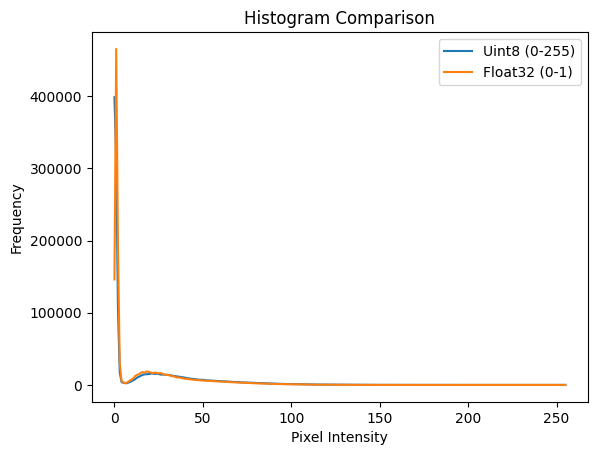

In [87]:
# For skimage + uint8
hist_uint8 = cv2.calcHist([img_uint8], [0], None, [256], [0, 256])

# For OpenCV normalized float32
hist_float32 = cv2.calcHist([img], [0], None, [256], [0, 1])

# Plotting
plt.plot(hist_uint8, label="Uint8 (0-255)")
plt.plot(hist_float32, label="Float32 (0-1)")
plt.title("Histogram Comparison")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


1. **Histogram Binning Matters**:
   - For **uint8**, bins `[0, 256]` perfectly align with pixel intensities `[0, 255]`.
   - For **float32 normalized**, bins `[0, 256]` are inappropriate; use `[0, 1]`.

2. **Scaling Changes Distribution**:
   - The manual scaling in the `skimage` approach ensures compatibility with default OpenCV settings.
   - The OpenCV normalized image requires adjusting the histogram range for meaningful results.

3. **Practical Advice**:
   - Use `[0, 1]` for normalized images when calculating histograms.
   - Always ensure that the bin range matches the pixel intensity range of your image.


3. Similarity Metrics
At each position, the similarity between the template and the region of the source image is calculated using a specific method. OpenCV supports several comparison methods:
- cv2.TM_SQDIFF: Sum of squared differences (lower score = better match).
- cv2.TM_CCORR: Cross-correlation (higher score = better match).
- cv2.TM_CCORR_NORMED: Normalized cross-correlation (higher score = better match).
- cv2.TM_CCOEFF: Correlation coefficient (higher score = better match).
- cv2.TM_CCOEFF_NORMED: Normalized correlation coefficient (higher score = better match).

### **How Template Matching Works**

#### 1. **Input Images**
   - **Template Image**: The smaller image you want to find.
   - **Source Image**: The larger image where you search for the template.

#### 2. **Sliding Window**
   - The algorithm slides the template over the source image, pixel by pixel (or by a defined step size), and compares the template to the corresponding region in the source image.

#### 3. **Similarity Metrics**
   - At each position, the similarity between the template and the region of the source image is calculated using a specific method. OpenCV supports several comparison methods:
     - `cv2.TM_SQDIFF`: Sum of squared differences (lower score = better match).
     - `cv2.TM_CCORR`: Cross-correlation (higher score = better match).
     - `cv2.TM_CCORR_NORMED`: Normalized cross-correlation (higher score = better match).
     - `cv2.TM_CCOEFF`: Correlation coefficient (higher score = better match).
     - `cv2.TM_CCOEFF_NORMED`: Normalized correlation coefficient (higher score = better match).

#### 4. **Output**
   - The algorithm produces a **heatmap** of similarity scores for each position in the source image.
   - The best match is typically the position with the highest (or lowest, depending on the method) score.

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the source and template images
source = cv2.imread("source_image.jpg", cv2.IMREAD_GRAYSCALE)  # Larger image
template = cv2.imread("template_image.jpg", cv2.IMREAD_GRAYSCALE)  # Smaller template
template_width, template_height = template.shape[::-1]

# Perform template matching
result = cv2.matchTemplate(source, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Find the top-left corner of the matching region
top_left = max_loc  # Use min_loc if using TM_SQDIFF
bottom_right = (top_left[0] + template_width, top_left[1] + template_height)

# Draw a rectangle around the matched region
output_image = source.copy()
cv2.rectangle(output_image, top_left, bottom_right, (255, 0, 0), 2)

# Visualize the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Matching Result Heatmap")
plt.imshow(result, cmap='hot')  # Heatmap of matching scores
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Detected Template Match")
plt.imshow(output_image, cmap='gray')
plt.axis("off")
plt.show()

### **Template Matching Methods**
| **Method**              | **Description**                                                                 | **Best Match**  |
|--------------------------|---------------------------------------------------------------------------------|-----------------|
| `cv2.TM_SQDIFF`          | Sum of squared differences (small differences mean a better match).             | Lowest score    |
| `cv2.TM_SQDIFF_NORMED`   | Normalized version of `TM_SQDIFF`.                                              | Lowest score    |
| `cv2.TM_CCORR`           | Cross-correlation (high scores indicate a good match).                         | Highest score   |
| `cv2.TM_CCORR_NORMED`    | Normalized cross-correlation (high scores = better).                            | Highest score   |
| `cv2.TM_CCOEFF`          | Correlation coefficient (high scores = better).                                | Highest score   |
| `cv2.TM_CCOEFF_NORMED`   | Normalized correlation coefficient (most robust and widely used).               | Highest score   |

#### **Choosing a Method**
- Use `TM_SQDIFF` if the template and region intensities are similar.
- Use `TM_CCOEFF_NORMED` for better performance in real-world scenarios (lighting, noise).


1. **Convert to Grayscale**:
   - Template matching works on intensity values, so both the source and template are converted to grayscale.
2. **Choose the Matching Method**:
   - Here, we use `cv2.TM_CCOEFF_NORMED`, but the choice depends on your use case.
3. **Obtain Match Location**:
   - Use `cv2.minMaxLoc` to find the minimum or maximum score, depending on the chosen method.
4. **Draw Rectangle**:
   - Use the matching location to draw a rectangle around the detected area.

### **Limitations of Template Matching**

1. **Exact Match Requirement**:
   - Template matching works well when the template exactly matches a region in the source image.
   - Fails if the template or source image has scale differences, rotations, or significant noise.

2. **Performance on Large Images**:
   - Sliding the template over large images is computationally expensive.
   - Optimizations like pyramid matching (searching at lower resolutions first) can help.

3. **Illumination Variations**:
   - If lighting conditions differ between the template and the source, matching may fail unless normalized methods (`TM_CCOEFF_NORMED`) are used.

4. **No Sub-Pixel Accuracy**:
   - The match location is discrete; sub-pixel refinement requires additional techniques like image interpolation.

### **Key Questions to Check Understanding**
1. How does the choice of the template matching method affect the results?
2. What challenges arise if the source image is rotated or scaled relative to the template?
3. How could you optimize template matching for large images?

---

Would you like to explore **advanced techniques** like multi-scale (pyramid-based) template matching or alternatives like feature-based matching with SIFT/ORB?

### **What is Segmentation?**

**Segmentation** in computer vision is the process of dividing an image into multiple parts or regions based on specific criteria such as color, texture, intensity, or other attributes. The primary goal is to simplify the image or make it more meaningful and easier to analyze by isolating objects, boundaries, or areas of interest.

It is **not just color detection or border detection**, but these can be **components** of segmentation depending on the method used. Here's a deeper explanation:


### **1. Types of Segmentation**

#### **a. Semantic Segmentation**
- **Goal**: Assign a label to every pixel in the image (e.g., "sky," "car," "road").
- **Output**: A mask where pixels belonging to the same category share the same label.
- **Example**: In a self-driving car, segment the image into road, pedestrians, and vehicles.

#### **b. Instance Segmentation**
- **Goal**: Segment individual objects of the same category separately.
- **Output**: Masks for each instance of an object (e.g., separating two cars).
- **Example**: Isolating each person in a crowd.

#### **c. Panoptic Segmentation**
- Combines **semantic** and **instance segmentation**: Labels every pixel and distinguishes between different instances of objects.

#### **d. Image Segmentation for Low-Level Tasks**
- Includes tasks like dividing an image into regions of similar **color**, **texture**, or **intensity**, often for preprocessing or further analysis.

### **2. How Segmentation Works**

#### **a. Color-Based Segmentation**
- Identifies regions of the image based on similar colors.
- Example: HSV-based color segmentation to isolate red, green, or blue objects.
- **Algorithm**: Thresholding (e.g., isolate pixels in a specific range of hue values in the HSV color space).

#### **b. Edge/Border Detection**
- Detects object boundaries by identifying sharp changes in intensity or color.
- Example: Using **Canny edge detection** to find object outlines.
- Often used as a preprocessing step for more complex segmentation methods.

#### **c. Region-Based Segmentation**
- Groups pixels into regions based on similarity.
- Example: **Watershed algorithm**, where the image is treated like a topographic map, and regions are "flooded" starting from local minima.

#### **d. Thresholding**
- Simplifies the image by converting it to binary (e.g., separate foreground and background).
- **Types**:
  - **Global Thresholding**: Single threshold for the entire image.
  - **Adaptive Thresholding**: Threshold changes for different regions of the image.

#### **e. Machine Learning/Deep Learning-Based Segmentation**
- Uses neural networks for pixel-wise classification (e.g., U-Net, Mask R-CNN).
- These models learn from labeled datasets and can handle complex patterns, lighting, and textures.

### **3. Is Segmentation Just Color Detection and Border Detection?**

No, segmentation is much more than that. Here's a breakdown:
- **Color Detection**:
  - Can be part of segmentation, especially for images where colors uniquely define regions (e.g., HSV thresholding).
  - Limited when objects have similar colors but different textures or shapes.

- **Border Detection**:
  - Often used as a preprocessing step to identify boundaries (e.g., edges detected using Canny or Sobel).
  - Alone, it doesn’t group pixels into meaningful regions; it just highlights edges.

Segmentation combines techniques (like region growing, clustering, or deep learning) to group pixels meaningfully.

### **4. Real-Life Applications of Segmentation**

1. **Medical Imaging**:
   - Segment organs, tissues, or tumors in X-rays, CT scans, or MRIs.
   - Example: Isolating a tumor in a CT scan.

2. **Autonomous Vehicles**:
   - Segment roads, pedestrians, and vehicles in real-time.

3. **Image Editing**:
   - Separate foreground and background for tasks like object removal or color correction.

4. **Satellite Imaging**:
   - Segment different land types (e.g., urban areas, forests, water bodies).

5. **Agriculture**:
   - Identify plant health, crop boundaries, or pests in aerial images.

# Create a mask for red
mask = cv2.inRange(image_hsv, lower_red, upper_red)

# Apply the mask to the original image
result = cv2.bitwise_and(image, image, mask=mask)


In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_hsv = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV)

# Define color range for red in HSV
lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])

# Create a mask for red
mask = cv2.inRange(image_hsv, lower_red, upper_red)

# Apply the mask to the original image
result = cv2.bitwise_and(image, image, mask=mask)


# Display
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Segmented")
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/core/src/arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


The error occurs because of a mismatch in the dimensions or data types between the `image`, `mask`, and the inputs expected by the `cv2.bitwise_and` function. Specifically, OpenCV requires the following:

1. **Mask Requirements**:
   - The mask (`cv2.inRange`) must be a single-channel (grayscale) image of type **uint8**.
   - It must have the same dimensions as the source image (`image`).

2. **Image Requirements**:
   - The source image must be of a compatible type, typically **uint8** for `cv2.bitwise_and`.



---

### **Steps to Fix the Issue**

#### 1. Ensure `image` is Defined and Matches `color_img`
It seems the variable `image` is either not defined or mismatched. If your original image is stored in `color_img`, replace `image` with `color_img` in your code:

```python
result = cv2.bitwise_and(color_img, color_img, mask=mask)
```

#### 2. Ensure `color_img` is of Type `uint8`
Check the data type of `color_img` and convert it to `uint8` if necessary:

```python
if color_img.dtype != 'uint8':
    color_img = (color_img * 255).astype(np.uint8)  # Scale if it's normalized (0.0 to 1.0)
```

#### 3. Ensure the Mask Matches the Image Dimensions
Verify that the mask has the same height and width as the image. The `cv2.inRange` function should naturally create a mask of the same dimensions as the input HSV image, but confirm this:

```python
if mask.shape[:2] != color_img.shape[:2]:
    raise ValueError("Mask dimensions do not match the input image dimensions.")
```

---

### **Updated Code**
Here’s the corrected code:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ensure the original image is loaded
color_img = cv2.imread("image.jpg")

# Convert to HSV
image_hsv = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV)

# Define color range for red in HSV
lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])

# Create a mask for red
mask = cv2.inRange(image_hsv, lower_red, upper_red)

# Apply the mask to the original image
result = cv2.bitwise_and(color_img, color_img, mask=mask)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Segmented")
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
```

---

### **Key Debugging Steps**
1. **Check `color_img` Type and Shape**:
   ```python
   print("Image dtype:", color_img.dtype, "Shape:", color_img.shape)
   ```
   - Must be `uint8` and have 3 channels (BGR).

2. **Check `mask` Type and Shape**:
   ```python
   print("Mask dtype:", mask.dtype, "Shape:", mask.shape)
   ```
   - Must be `uint8` and match the width and height of the original image.

---

### **Root Cause**
The error occurred because:
1. **`image` variable was not properly defined.** You should be using `color_img` in your operation.
2. **Mismatch in type or dimensions** between the `image` and `mask`.

Let me know if this solves your issue!

1. **When would edge detection fail for segmentation?**
   - (Hint: Think about noisy or low-contrast images.)

2. **What are the limitations of color-based segmentation?**
   - (Hint: Consider objects with similar colors or varying lighting.)

3. **How does deep learning improve segmentation tasks compared to traditional methods?**

Let me know if you'd like to explore any specific type of segmentation in more depth, or if you'd like examples of other methods!

In [102]:
gray_img.dtype

dtype('float64')

In [104]:
# Why isn't this working?
# Apply Global Thresholding
gray_img = cv2.imread("../images/Osteosarcoma_01.tif", cv2.IMREAD_GRAYSCALE).astype('float32') / 255.0

_, thresh_global = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

# Apply Adaptive Thresholding
thresh_adaptive = cv2.adaptiveThreshold(
    gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
)

# Apply Otsu's Thresholding
_, thresh_otsu = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display Results
titles = ["Original Image", "Global Thresholding", "Adaptive Thresholding", "Otsu's Thresholding"]
images = [gray_img, thresh_global, thresh_adaptive, thresh_otsu]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/thresh.cpp:1679: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'adaptiveThreshold'


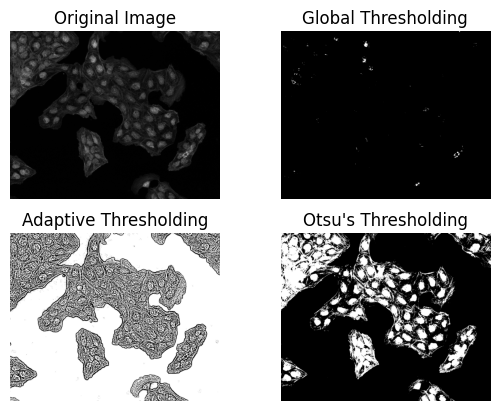

In [105]:
import cv2
import matplotlib.pyplot as plt

# Load the grayscale image as uint8
gray_img = cv2.imread("../images/Osteosarcoma_01.tif", cv2.IMREAD_GRAYSCALE)

# Apply Global Thresholding
_, thresh_global = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

# Apply Adaptive Thresholding
thresh_adaptive = cv2.adaptiveThreshold(
    gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
)

# Apply Otsu's Thresholding
_, thresh_otsu = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display Results
titles = ["Original Image", "Global Thresholding", "Adaptive Thresholding", "Otsu's Thresholding"]
images = [gray_img, thresh_global, thresh_adaptive, thresh_otsu]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


### **Thresholding: A Step-by-Step Walkthrough**

Let’s dive into thresholding in image processing, starting from the fundamentals and going into the nuances, pitfalls, and practical examples. This walkthrough will include questions to make it interactive and engaging!

---

### **1. What is Thresholding?**
Thresholding is a method to **simplify an image** by turning it into a binary representation (black and white). It’s often the first step in tasks like segmentation, object detection, or feature extraction.

#### **How It Works**
For every pixel intensity \( I(x, y) \) in a grayscale image:
- Compare \( I(x, y) \) to a **threshold value** \( T \):
  - If \( I(x, y) > T \): Set the pixel to **white** (255).
  - Otherwise: Set the pixel to **black** (0).

Mathematical Formula:
\[
O(x, y) = 
\begin{cases} 
\text{Max Value (e.g., 255)} & \text{if } I(x, y) > T \\
\text{Min Value (e.g., 0)} & \text{otherwise}
\end{cases}
\]

---

### **2. Why Use Thresholding?**
Thresholding is a simple way to:
1. Isolate objects from the background.
2. Create binary masks for further processing.
3. Simplify the image for edge detection or shape analysis.

---

### **3. Types of Thresholding**

#### **a. Global Thresholding**
- A single threshold \( T \) is applied to the entire image.

#### **b. Adaptive Thresholding**
- Different threshold values are computed for different regions of the image (good for uneven lighting).

#### **c. Otsu’s Thresholding**
- Automatically calculates the optimal threshold value for images with bimodal intensity distributions.

---

### **4. Walkthrough Example: Global Thresholding**

#### **Step 1: Load the Image**
We’ll start with a grayscale image.

```python
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()
```

#### **Question**:
- Why do we use grayscale images for thresholding?

*(Hint: Color images have 3 channels, and thresholding works on intensity values.)*

---

#### **Step 2: Apply Global Thresholding**

Let’s set a fixed threshold \( T = 127 \) and use OpenCV’s `cv2.threshold` function.

```python
# Apply global thresholding
_, thresh_binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Display the result
plt.imshow(thresh_binary, cmap='gray')
plt.title("Global Thresholding (T=127)")
plt.axis('off')
plt.show()
```

---

### **5. Common Pitfalls in Global Thresholding**

#### **Pitfall 1: Choosing the Wrong Threshold**
- A poor choice of \( T \) leads to bad results, especially in uneven lighting.
- Experiment by varying \( T \):

```python
for T in [50, 100, 150, 200]:
    _, thresh = cv2.threshold(image, T, 255, cv2.THRESH_BINARY)
    plt.imshow(thresh, cmap='gray')
    plt.title(f"Threshold = {T}")
    plt.axis('off')
    plt.show()
```

#### **Question**:
- What happens to the segmentation when \( T \) is too high or too low?

---

#### **Pitfall 2: Noise in the Image**
- Noise affects thresholding because small intensity variations can result in incorrect segmentation.
- **Solution**: Preprocess the image (e.g., Gaussian blur) before thresholding.

```python
# Apply Gaussian blur
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply thresholding on the blurred image
_, thresh_blurred = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

plt.imshow(thresh_blurred, cmap='gray')
plt.title("Thresholding After Blurring")
plt.axis('off')
plt.show()
```

---

### **6. Adaptive Thresholding**

#### **When to Use Adaptive Thresholding?**
Global thresholding fails when lighting varies across the image. Adaptive thresholding computes different thresholds for smaller regions.

#### **How It Works**
- Divide the image into small regions (blocks).
- Compute the threshold for each region using:
  - **Mean** intensity of the block.
  - **Gaussian-weighted sum** of pixel intensities in the block.

---

#### **Code Example: Adaptive Thresholding**
```python
# Adaptive Mean Thresholding
thresh_mean = cv2.adaptiveThreshold(
    image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
)

# Adaptive Gaussian Thresholding
thresh_gaussian = cv2.adaptiveThreshold(
    image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Display Results
plt.subplot(1, 2, 1)
plt.imshow(thresh_mean, cmap='gray')
plt.title("Adaptive Mean Thresholding")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresh_gaussian, cmap='gray')
plt.title("Adaptive Gaussian Thresholding")
plt.axis('off')

plt.show()
```

#### **Question**:
- How does block size (e.g., `11` in the code) affect the result? What happens if you use a very small or very large block size?

---

### **7. Otsu’s Thresholding**

#### **What is Otsu’s Method?**
Otsu’s method calculates the threshold that minimizes intra-class variance (variance within foreground and background pixels). It works well for images with two intensity peaks (bimodal histograms).

#### **Code Example: Otsu’s Thresholding**
```python
# Apply Gaussian Blur
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Otsu's Thresholding
_, thresh_otsu = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(thresh_otsu, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')
plt.show()
```

#### **Question**:
- Why does Otsu’s method perform better on blurred images?

---

### **8. Comparing All Methods**
```python
# Apply all methods
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
adaptive_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
adaptive_gaussian = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
_, otsu_thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display results
titles = ["Global Threshold", "Adaptive Mean", "Adaptive Gaussian", "Otsu's Threshold"]
images = [global_thresh, adaptive_mean, adaptive_gaussian, otsu_thresh]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()
```

---

### **9. Summary of Thresholding Types**

| **Method**                | **Best For**                       | **Limitations**                                    |
|---------------------------|-------------------------------------|--------------------------------------------------|
| **Global Thresholding**   | Uniform lighting                   | Fails with varying illumination                  |
| **Adaptive Thresholding** | Non-uniform lighting               | Sensitive to noise                               |
| **Otsu's Thresholding**   | Bimodal histograms (two peaks)     | Requires preprocessing for noisy images          |

---

### **10. Questions for Understanding**
1. What are the advantages of adaptive thresholding over global thresholding?
2. How does preprocessing (e.g., blurring) improve Otsu’s method?
3. Can thresholding be applied directly to color images? Why or why not?
